RMSE: 0.4429 (em centenas de milhares de USD)
R¬≤: 0.8503


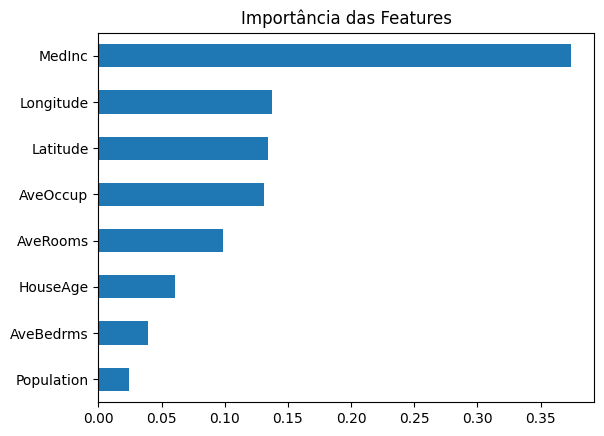

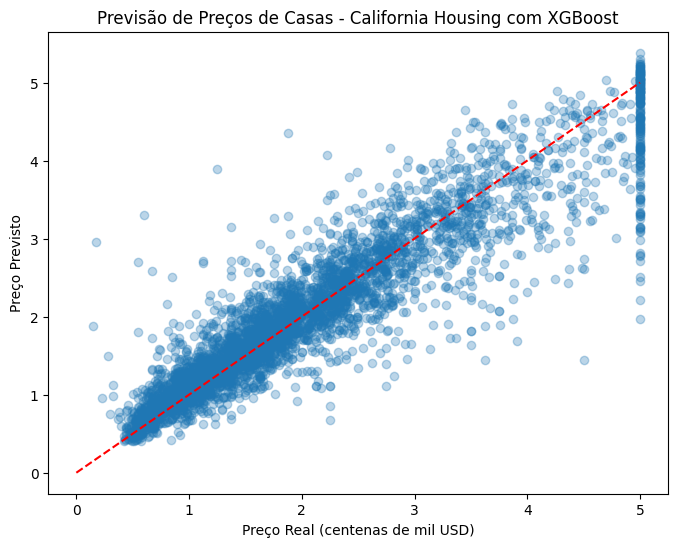

In [1]:
# 1Ô∏è‚É£ Instalar depend√™ncias (se necess√°rio)
# pip install xgboost scikit-learn matplotlib pandas

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2Ô∏è‚É£ Carregar dataset California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target  # pre√ßo mediano em centenas de milhares de d√≥lares

# 3Ô∏è‚É£ Dividir dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4Ô∏è‚É£ Criar e treinar o modelo XGBoost
model = XGBRegressor(
    n_estimators=500,       # n√∫mero de √°rvores
    learning_rate=0.05,     # taxa de aprendizagem
    max_depth=6,            # profundidade m√°xima das √°rvores
    subsample=0.8,          # percentagem de dados usada por √°rvore
    colsample_bytree=0.8,   # percentagem de features usadas por √°rvore
    random_state=42
)
model.fit(X_train, y_train)

# 5Ô∏è‚É£ Fazer previs√µes
y_pred = model.predict(X_test)

# 6Ô∏è‚É£ Avalia√ß√£o do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} (em centenas de milhares de USD)")
print(f"R¬≤: {r2:.4f}")

# 7Ô∏è‚É£ Import√¢ncia das vari√°veis
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh", title="Import√¢ncia das Features")
plt.show()

# 8Ô∏è‚É£ Compara√ß√£o real vs previsto
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], color="red", linestyle="--")  # linha ideal (previs√£o perfeita)
plt.xlabel("Pre√ßo Real (centenas de mil USD)")
plt.ylabel("Pre√ßo Previsto")
plt.title("Previs√£o de Pre√ßos de Casas - California Housing com XGBoost")
plt.show()





## üß† Explica√ß√£o:

* **Contexto:** Cada linha representa uma √°rea geogr√°fica da Calif√≥rnia, com vari√°veis socioecon√≥micas e f√≠sicas.
* **Objetivo:** Prever o pre√ßo mediano das casas nessa √°rea.
* **XGBoost:** Constr√≥i v√°rias √°rvores de decis√£o que aprendem de forma sequencial, corrigindo erros anteriores.
* **RMSE:** Mostra o erro m√©dio (em centenas de mil USD).
* **R¬≤:** Mede a qualidade da previs√£o (quanto mais perto de 1, melhor).
* **Gr√°fico real vs previsto:** Permite ver se o modelo segue bem a tend√™ncia real.

